<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Multilinear_Regression_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [29]:
df = pd.read_csv('Clothing.csv')
df = df[["tsales", "margin", "nown", "inv1", "inv2","hoursw", "ssize", "start"]]
df.head()

,tsales,margin,nown,inv1,inv2,hoursw,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,76,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,192,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,114,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,100,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,104,50,44.0


In [30]:
df.describe()

,tsales,margin,nown,inv1,inv2,hoursw,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,121.137500,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,64.435343,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,32.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,104.000000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,145.250000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,582.000000,1214.000000,90.000000


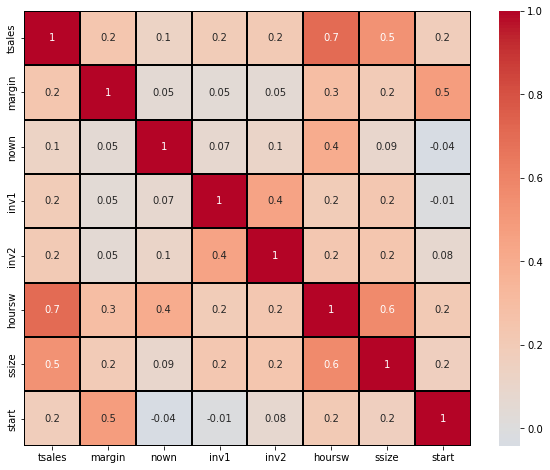

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            linecolor='black',
            linewidth=1,
            cmap='coolwarm',
            center=0)

In [32]:
X = df.drop('tsales', axis=1)
y = df['tsales']
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 8), (80, 8), (320,), (80,))

In [34]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     45.22
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           6.06e-44
Time:                        05:05:58   Log-Likelihood:                -4582.7
No. Observations:                 320   AIC:                             9181.
Df Residuals:                     312   BIC:                             9212.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.256e+04   1.78e+05      0.408      0.6

In [35]:
preds = model.predict(X_test)

270    2.586293e+06
380    1.086191e+06
326    9.896939e+05
60     4.349409e+05
dtype: float64

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, preds))
mean_absolute_error(y_test,preds)

132509757807.12007


254953.91368375422